RNN


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.utils.data_utils import pad_sequences
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

In [4]:
df = pd.read_csv('spam.csv')
df.head()

FileNotFoundError: ignored

In [ ]:
df.tail(10)

,Category,Message
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...
5563,ham,Ard 6 like dat lor.
5564,ham,Why don't you wait 'til at least wednesday to ...
5565,ham,Huh y lei...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [ ]:
print("Shape:", df.shape)
print("Columns:", list(df.columns))

Shape: (5572, 2)
Columns: ['Category', 'Message']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.dtypes

Category    object
Message     object
dtype: object

In [ ]:
print("Missing values:", df.isnull().sum())

Missing values: Category    0
Message     0
dtype: int64


In [ ]:
df.nunique()

Category       2
Message     5157
dtype: int64

In [ ]:
sms_length = df['Message'].apply(len)
print("Max sms length:", sms_length.max())
print("Min sms length:", sms_length.min())
print("Average sms length:", sms_length.mean())

Max sms length: 910
Min sms length: 2
Average sms length: 80.36934673366834


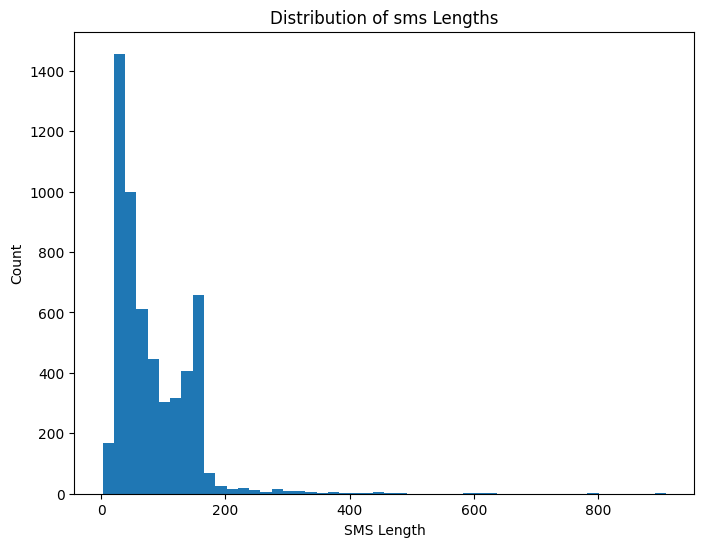

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(sms_length, bins=50)
plt.title("Distribution of sms Lengths")
plt.xlabel("SMS Length")
plt.ylabel("Count")
plt.show()

In [ ]:
df['target'] = df['Category'].map( {'spam':1, 'ham':0 })

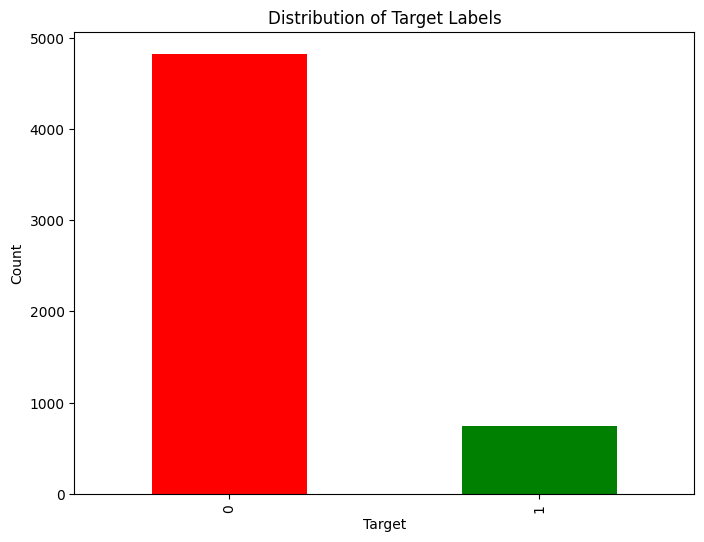

In [ ]:
plt.figure(figsize=(8, 6))
df['target'].value_counts().plot(kind='bar', color=['r', 'g'])
plt.title("Distribution of Target Labels")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

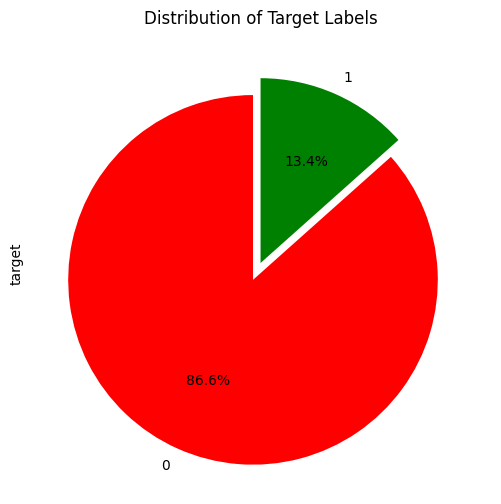

In [ ]:
plt.figure(figsize=(8, 6))
df['target'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90,
                                   explode=[0.1, 0], colors=['r', 'g'])
plt.title("Distribution of Target Labels")
plt.show()

In [ ]:
df_train = df.sample(frac=.8, random_state=42)
df_test = df.drop(df_train.index)
print(df_train.shape, df_test.shape)

(4458, 3) (1114, 3)


In [ ]:
y_train = df_train['target'].values
y_test = df_test['target'].values
y_test.shape

(1114,)

In [ ]:
X_train = df_train['Message'].values
X_test = df_test['Message'].values

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
word_dict = tokenizer.index_word

In [ ]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [ ]:
X_train_pad = pad_sequences(X_train_seq, maxlen=20, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=20, padding='post')
X_train_pad.shape

(4458, 20)

In [ ]:
vocabulary = 10000
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=vocabulary+1, output_dim=20, input_length=20))
lstm_model.add(LSTM(400))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.summary()

NameError: ignored

In [ ]:
history = lstm_model.fit(X_train_pad, y_train, epochs=10, batch_size=64,
                        validation_data=(X_test_pad, y_test))

Epoch 1/10
70/70 [==============================] - 19s 228ms/step - loss: 0.1926 - accuracy: 0.9233 - val_loss: 0.0826 - val_accuracy: 0.9758
Epoch 2/10
70/70 [==============================] - 15s 218ms/step - loss: 0.0348 - accuracy: 0.9924 - val_loss: 0.1218 - val_accuracy: 0.9749
Epoch 3/10
70/70 [==============================] - 15s 220ms/step - loss: 0.0160 - accuracy: 0.9964 - val_loss: 0.0764 - val_accuracy: 0.9794
Epoch 4/10
70/70 [==============================] - 15s 218ms/step - loss: 0.0075 - accuracy: 0.9984 - val_loss: 0.1333 - val_accuracy: 0.9794
Epoch 5/10
70/70 [==============================] - 15s 214ms/step - loss: 0.0082 - accuracy: 0.9980 - val_loss: 0.1809 - val_accuracy: 0.9767
Epoch 6/10
70/70 [==============================] - 17s 242ms/step - loss: 0.0054 - accuracy: 0.9987 - val_loss: 0.1993 - val_accuracy: 0.9740
Epoch 7/10
70/70 [==============================] - 15s 218ms/step - loss: 3.7592e-04 - accuracy: 1.0000 - val_loss: 0.2166 - val_accuracy: 0.

In [ ]:
sms_test = ['Hi Paul, would you come around tonight']
sms_seq = tokenizer.texts_to_sequences(sms_test)
sms_pad = pad_sequences(sms_seq, maxlen=20, padding='post')
# Use the predict() method to obtain the model's output probabilities
predictions=(lstm_model.predict(sms_pad) > 0.5).astype("int32")

# Print the predicted class label
print("Predicted class label:", predictions)



1/1 [==============================] - 0s 440ms/step
Predicted class label: [[0]]


In [ ]:
sms_test = ['You are eligible for the loan now please click the below link to fill the form']
sms_seq = tokenizer.texts_to_sequences(sms_test)
sms_pad = pad_sequences(sms_seq, maxlen=20, padding='post')

# Use the predict() method to obtain the model's output probabilities
predictions=(lstm_model.predict(sms_pad) > 0.5).astype("int32")

# Print the predicted class label
print("Predicted class label:", predictions)

1/1 [==============================] - 0s 36ms/step
Predicted class label: [[1]]
